# Decision Tree

In this notebook, we have implemented decision tree learner of a popular machine learning module, scikit-learn. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
import joblib


### Importing Pre-Processed dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
x_train = train.drop(columns = ['Income', 'Final Weight'])
y_train = train['Income']

final_weight_test = test["Final Weight"]
x_test = test.drop(columns = ['Income', 'Final Weight'])
y_test = test['Income']

### Decision trees in Scikit-learn

Fitting the decision tree with the default parameters. 

### Default Parameters

In [4]:
default_dt = DecisionTreeClassifier()
default_dt.fit(x_train, y_train)

DecisionTreeClassifier()

Fitting the model on the training set using the default parameters and not plotting the tree with the default parameters as there will be a lot of leafs and thus, it makes no sense to visualise it with the default values.

### Testing/Predicting on the test set

In [5]:
y_pred_default = default_dt.predict(x_test)

Creating a confusion matrix for the test set.

c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


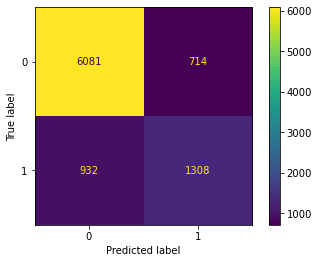

<Figure size 36x36 with 0 Axes>

In [6]:
plot_confusion_matrix(default_dt, x_test, y_test)

plt.figure(figsize=(0.5,0.5))
plt.show()

Here,from the confusion matrix, we can see that it classifies class 0 (income <=50k) correctly 6081(True Negative) out of total 6795 where 714 is incorrectly classified(False Positive:Type 1 ERROR). Therefore, we can conclude that it does very good classification for class 0 (<=50K). For class 1 (income >50k), it classfies 1308 correctly(True Positive) and 932 incorrect (False Negative: Type 2 ERROR). The minority class is not classfied so well. Therefore, we need to tune the hyperparameters before fitting the model. 

In [7]:
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6795
           1       0.65      0.58      0.61      2240

    accuracy                           0.82      9035
   macro avg       0.76      0.74      0.75      9035
weighted avg       0.81      0.82      0.81      9035



It is predicting the class 0 (income>50k) very well, indicating some overfitting. The f-1 score for class 0 is 0.88 and 0.61 for class 1. The overall accuracy of the model is 0.82. Here, the focus is on the precision, recall and f-1 score rather than accuracy beacuse our target variable has a skewed distribution. 

<h3>Hyper Parameter Tuning</h3>

As distribution of examples across the known classes is biased or skewed, therefore the minor class (income > 50k (1)) is prioritised in grid search

In [15]:
f1 = make_scorer(f1_score , pos_label = 1, average='binary')
# Create the parameter grid 
param_grid = {
    'max_depth': range(5,10),
    'min_samples_leaf': range(1,10),
    'min_samples_split': range(1,10),
    'criterion': ["entropy", "gini"],
    'splitter': ["best", "random"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring=f1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\sklearn\tree\_classes.py", line 254, in fit
    % self.min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, pos_label=1, average=binary),
             verbose=1)

The results of cross validation using GridSearchCV.

In [16]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011368,0.001354,0.000000,0.000000,entropy,5,1,1,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1620
1,0.008983,0.000026,0.000000,0.000000,entropy,5,1,1,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1444
2,0.043751,0.002738,0.005986,0.001549,entropy,5,1,2,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.593196,0.650752,0.637334,0.623782,0.616557,0.624324,0.019479,849
3,0.028915,0.000640,0.005044,0.000112,entropy,5,1,2,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.561221,0.597282,0.571525,0.583826,0.623145,0.587400,0.021566,1387
4,0.042150,0.001110,0.004974,0.000012,entropy,5,1,3,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.592698,0.650752,0.637099,0.623782,0.616557,0.624177,0.019608,872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,0.055659,0.015181,0.007176,0.003424,gini,9,9,7,random,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.639156,0.642276,0.641556,0.600801,0.636422,0.632042,0.015755,614
1616,0.065357,0.001649,0.005191,0.000390,gini,9,9,8,best,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.642416,0.671770,0.658139,0.660515,0.678091,0.662186,0.012287,272
1617,0.051947,0.018130,0.005378,0.000495,gini,9,9,8,random,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.637129,0.643013,0.619864,0.631248,0.653074,0.636866,0.011146,560
1618,0.111850,0.040829,0.009773,0.003960,gini,9,9,9,best,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.642416,0.671770,0.658349,0.660515,0.678091,0.662228,0.012273,268


In [17]:
# printing the optimal accuracy score and hyperparameters
print("Best F-1 Score: ", grid_search.best_score_)
print("It was achieved using the following hyper-parameters:")
print(grid_search.best_params_)

Best F-1 Score:  0.6722166324782753
It was achieved using the following hyper-parameters:
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'best'}


### Creating a model using the best hyper-parameters: 

In [12]:
# model with optimal hyperparameters
tuned_model = DecisionTreeClassifier(criterion = "entropy",                       
                                      max_depth=8,
                                  min_samples_leaf=3,
                                  min_samples_split=9,
                                    
                                    splitter="best"
                                    )
tuned_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=18)

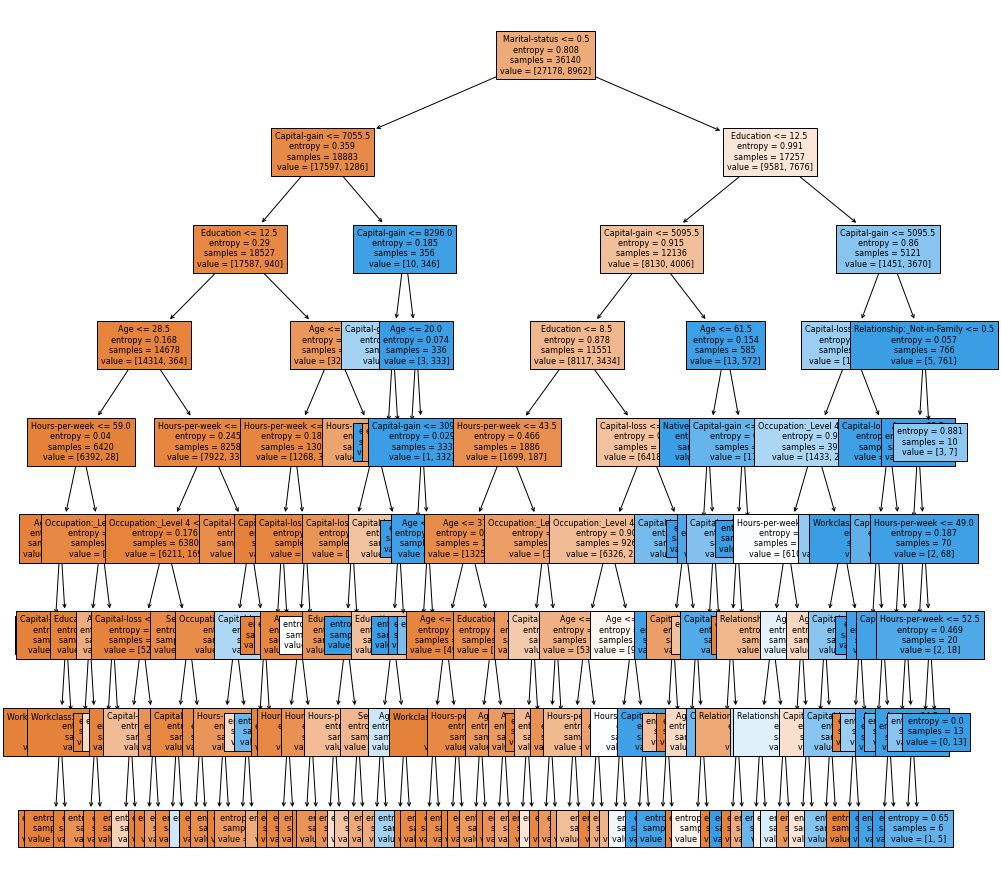

In [24]:
# Plots the decsion tree
plot_tree(tuned_model, filled=True, feature_names = x_train.columns, fontsize =8)
plt.rcParams['figure.figsize'] = [8,8]

In [18]:
# testing on the test 
y_pred_test = tuned_model.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6795
           1       0.75      0.63      0.68      2240

    accuracy                           0.85      9035
   macro avg       0.81      0.78      0.79      9035
weighted avg       0.85      0.85      0.85      9035



c:\users\lenovo\anaconda3\envs\geospatial\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


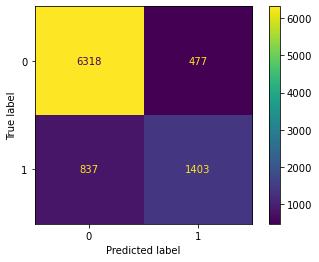

<Figure size 36x36 with 0 Axes>

In [19]:
plot_confusion_matrix(tuned_model, x_test, y_test)
plt.figure(figsize=(0.5,0.5))
plt.show()

After tunning the model with the optimal hyper-parameters, the f-1 score of the minority class is improved. Earlier,it was 0.62, now it is 0.68. Same goes for the majority class.

Here,from the confusion matrix, we can see that it classifies class 0 (income <=50k) correctly 6318(True Negative) out of total 6446 where 477 is incorrectly classified(False Positive:Type 1 ERROR). For class 1 (income >50k), it classfies 1403 correctly(True Positive) and 837 incorrect (False Negative: Type 2 ERROR), which has improved from default parameters.

After hyper-tunning the parameters,the f-1 score, Type 1 error and Type 2 error has improved for both the classes.  

### Taking into account final weight

Creating a function that returns a classification report on the minority class with taking the weight of each row into account in order to produce a more accurate classification report.

In [20]:
def calculate_weighted_classification(final_weight, y_pred_income, y_actual):
    df = pd.DataFrame(final_weight)
    df["Predicted_Income"] = y_pred_income
    df["Actual_Income"] = y_actual
    true_positive = 0
    false_negatives = 0
    false_positive = 0
    for i in range(len(df)):
        actual_income = df.iloc[i]["Actual_Income"]
        predicted_income = df.iloc[i]["Predicted_Income"]
        final_weight = df.iloc[i]["Final Weight"]
        if actual_income == 1 and predicted_income == 1:
            true_positive += final_weight
        elif actual_income == 1 and predicted_income == 0:
            false_negatives += final_weight
        elif actual_income == 0 and predicted_income == 1:
            false_positive += final_weight
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negatives)
    f1= (2 * precision * recall) / (precision + recall)
    return precision, recall, f1

In [21]:
precision, recall, f1 = calculate_weighted_classification(final_weight_test, y_pred_test, y_test)
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")

Weighted Precision: 0.762934310944565
Weighted Recall: 0.6255359907647139
Weighted F1 Score: 0.6874369145635915


### Exporting for model essemble 

In [22]:
joblib.dump(tuned_model, 'dt.pkl', compress=9)

['dt.pkl']